In [1]:
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_animal_tree()
plt.suptitle("animal_tree")

Text(0.5,0.98,'animal_tree')

# Building decision trees

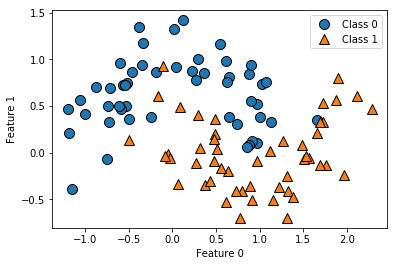

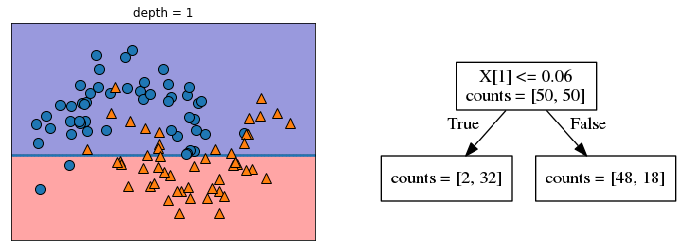

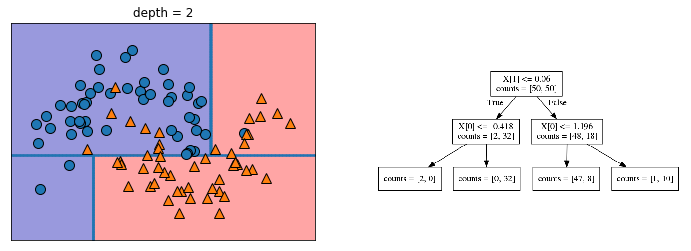

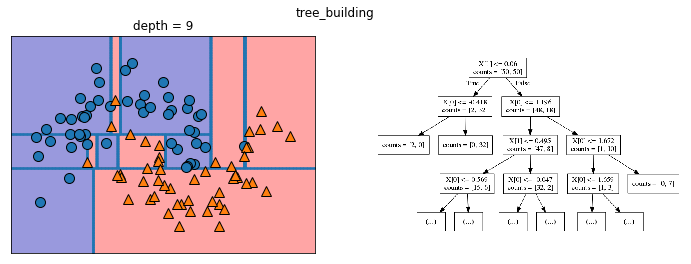

In [2]:
mglearn.plots.plot_tree_progressive()
plt.suptitle("tree_building");

# Controlling complexity of decision trees

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.937063
accuracy on training set: 0.988263
accuracy on test set: 0.951049


# Analyzing Decision Trees

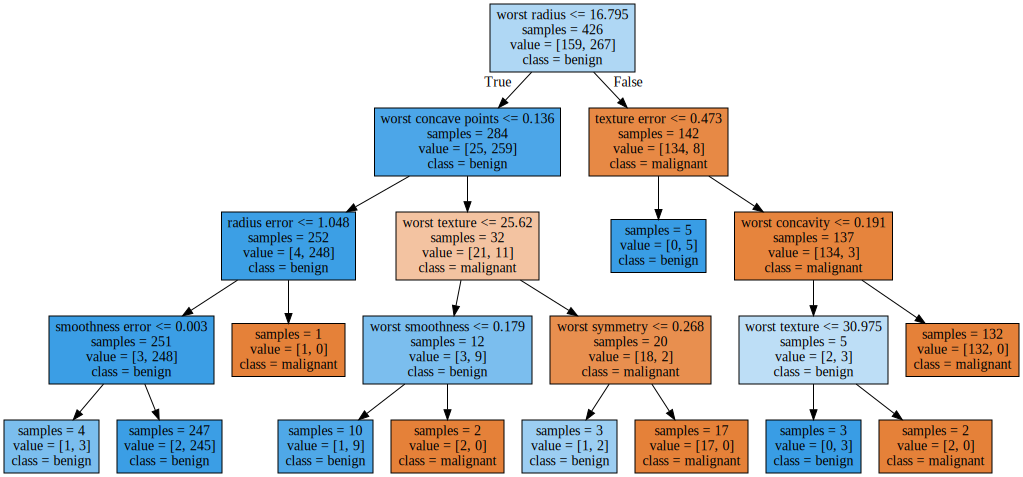

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="mytree.dot", class_names=["malignant", "benign"],
 feature_names=cancer.feature_names, impurity=False, filled=True)
import graphviz
with open("mytree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

# Feature Importance in trees

(0, 1)

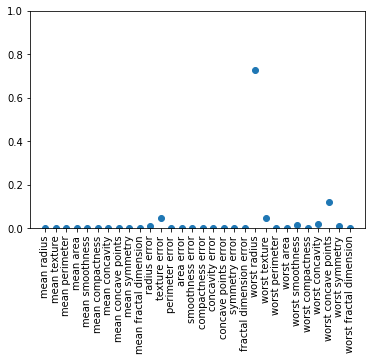

In [5]:
tree.feature_importances_
plt.plot(tree.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(0, 1)

Feature importances: [0. 1.]


Text(0.5,0.98,'tree_not_monotone')

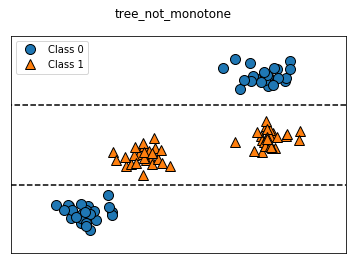

In [6]:
import mglearn
tree = mglearn.plots.plot_tree_not_monotone()
plt.suptitle("tree_not_monotone")

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0,0.5,'price in $/Mbyte')

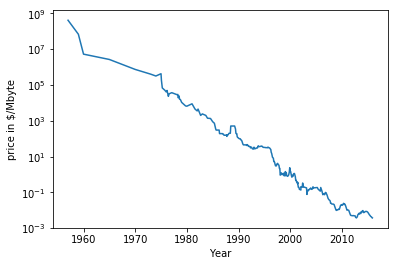

In [7]:
import os
import mglearn
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))
plt.semilogy(ram_prices.date , ram_prices.price)
plt.xlabel("Year")
plt.ylabel("price in $/Mbyte")

# Ensembles of Decision Trees

# Analyzing random forests

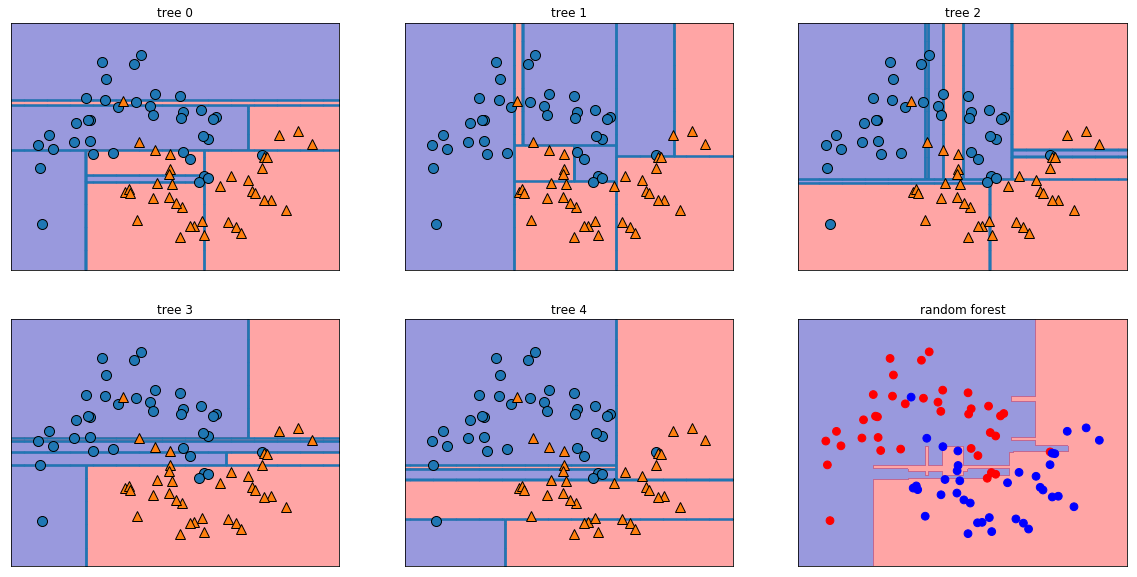

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
 max_depth=None, max_features='auto', max_leaf_nodes=None,
 min_samples_leaf=1, min_samples_split=2,
 min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
 oob_score=False, random_state=2, verbose=0, warm_start=False)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
 ax.set_title("tree %d" % i)
 mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("random forest")
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.array(['r', 'b'])[y_train], s=60)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.972028


# Gradient Boosted Regression Trees (Gradient Boosting Machines)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.965035
accuracy on training set: 0.990610
accuracy on test set: 0.972028
accuracy on training set: 0.988263
accuracy on test set: 0.965035


In [1]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plt.plot(gbrt.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

NameError: name 'GradientBoostingClassifier' is not defined

# Kernelized Support Vector Machines
# Linear Models and Non-linear Features

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Text(0,0.5,'feature2')

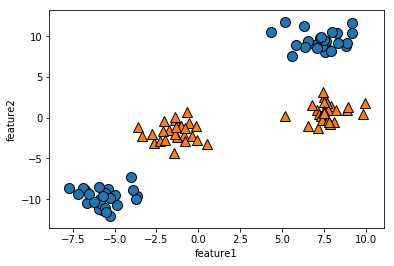

In [11]:
import mglearn
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("feature1")
plt.ylabel("feature2")

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0,0.5,'feature2')

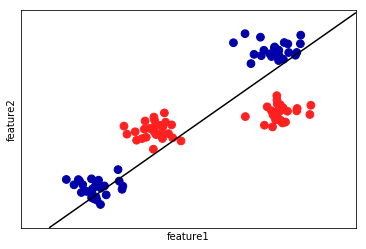

In [12]:
import mglearn
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel("feature1")
plt.ylabel("feature2")

Text(0.5,0,'feature1 ** 2')

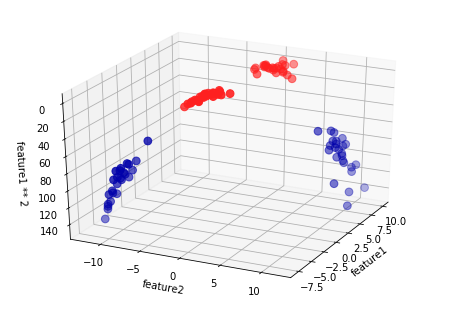

In [13]:
# add the squared first feature
import matplotlib.pyplot as plt
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature1 ** 2")

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5,0,'feature1 ** 2')

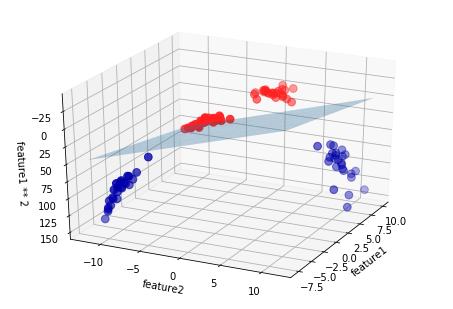

In [14]:
import matplotlib.pyplot as plt
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min(), X_new[:, 0].max(), 50)
yy = np.linspace(X_new[:, 1].min(), X_new[:, 1].max(), 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=mglearn.cm2, s=60)
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature1 ** 2")

Text(0,0.5,'feature2')

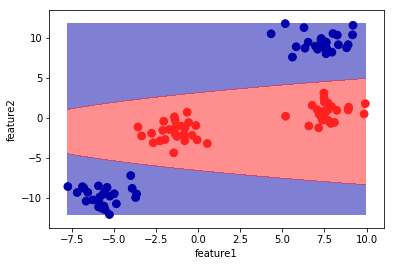

In [15]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
 cmap=mglearn.cm2, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel("feature1")
plt.ylabel("feature2")

# The Kernel Trick
# Understanding SVMs

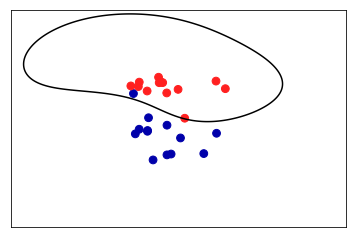

In [16]:
import mglearn
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=5)
# plot data
plt.scatter(X[:, 0], X[:,1], s=60, c=y, cmap=mglearn.cm2)
# plot support vectors
sv = svm.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=200, facecolors='none', zorder=10, linewidths=3)

# Tuning SVM parameters

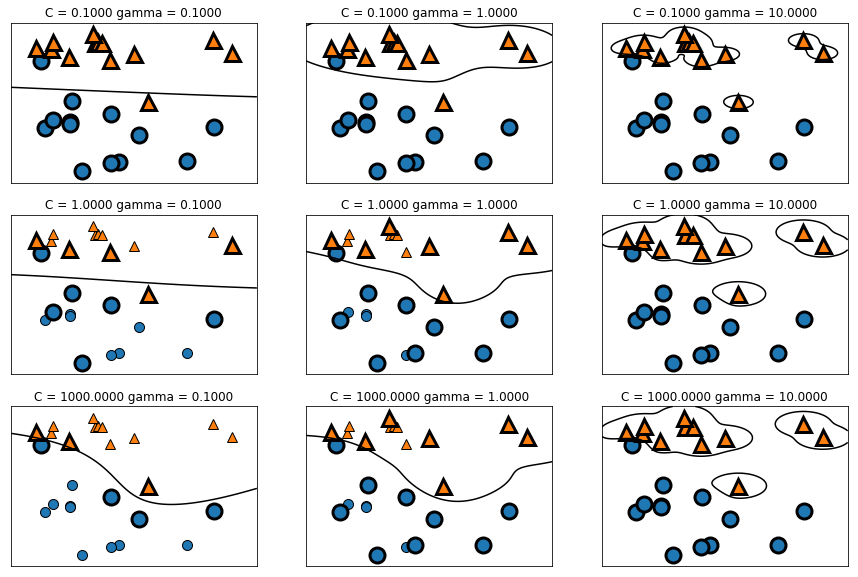

In [17]:
import matplotlib.pyplot as plt
fig, axes =plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes,[-1, 0, 3]):
    for a, gamma in zip (ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("accuracy on training set: %f" % svc.score(X_test, y_test))
print("accuracy on training set: %f" % svc.score(X_test, y_test))

accuracy on training set: 0.937063
accuracy on training set: 0.937063


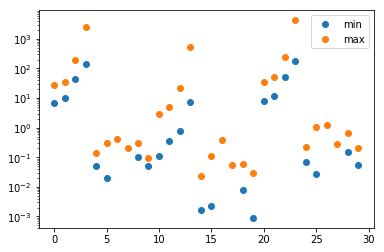

In [19]:
import matplotlib.pyplot as plt
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), 'o', label="max")
plt.legend(loc="best")
plt.yscale("log")

# Preprocessing data for SVMs

In [20]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, divide by range
# afterwards min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("minimum for each feature\n%s" % X_train_scaled.min(axis=0))
print("maximum for each feature\n%s" % X_train_scaled.max(axis=0))

minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [21]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("accuracy on training set: %f" % svc.score(X_train_scaled, y_train))
print("accuracy on test: %f" % svc.score(X_test_scaled, y_test))

accuracy on training set: 0.983568
accuracy on test: 0.972028


In [22]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("accuracy on training set: %f" % svc.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % svc.score(X_test_scaled, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.958042


# Neural Networks (Deep Learning)
# The Neural Network Model

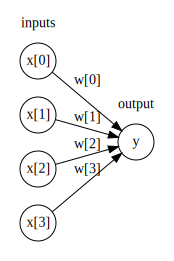

In [23]:
import mglearn
mglearn.plots.plot_logistic_regression_graph()

Figure single_hidden_layer


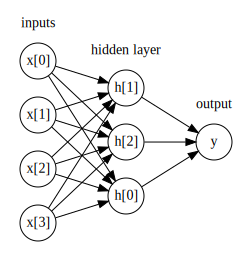

In [24]:
import mglearn
print("Figure single_hidden_layer")
mglearn.plots.plot_single_hidden_layer_graph()

Text(0.5,1,'activation_functions')

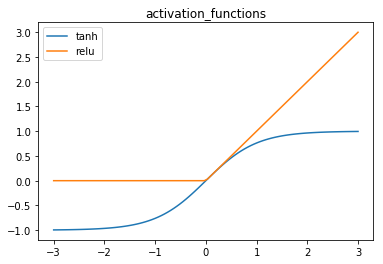

In [25]:
import matplotlib.pyplot as plt
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.title("activation_functions")

Figure two_hidden_layers


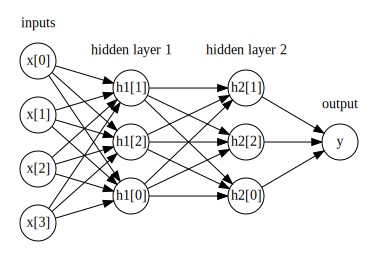

In [26]:
import mglearn
print("Figure two_hidden_layers")
mglearn.plots.plot_two_hidden_layer_graph()

# Tuning Neural Networks

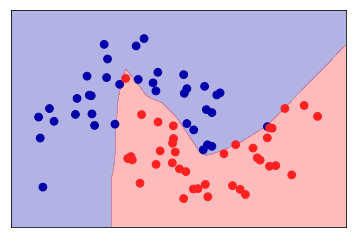

In [27]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver ='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


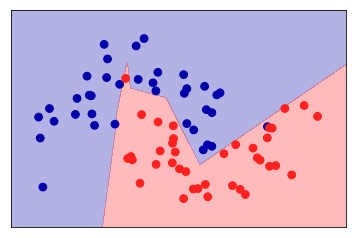

In [28]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

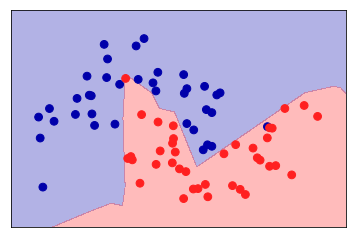

In [29]:
# using two hidden layers, with 10 units each
import mglearn
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

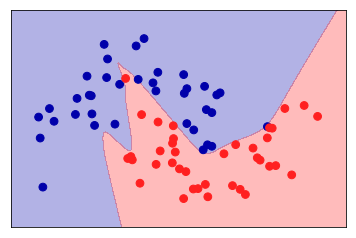

In [30]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity.
import mglearn
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

NameError: name 'MLPClassifier' is not defined

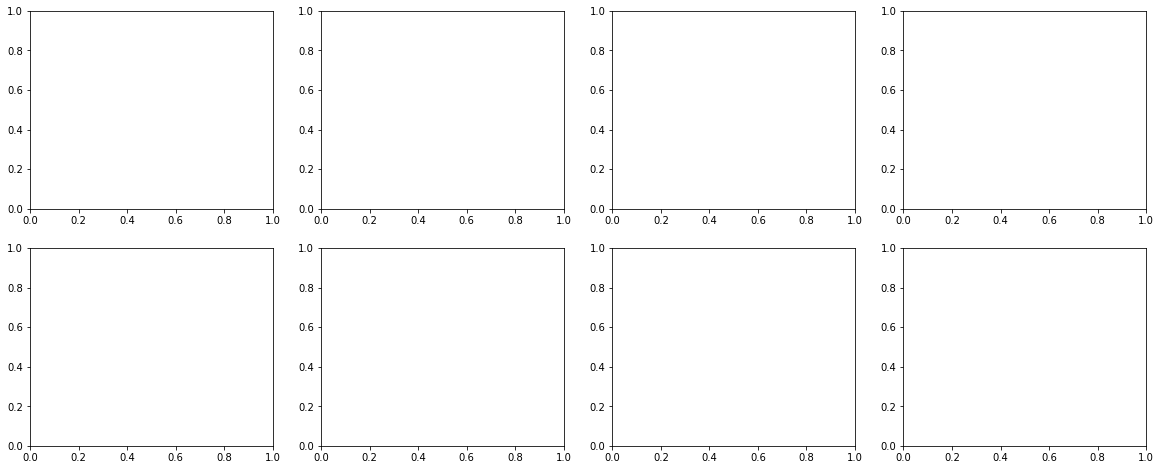

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for ax, n_hidden_nodes in zip(axes, [10, 100]):
   for axx, alpha in zip(ax, [0.0001, 0.01, 0.1, 1]):
       mlp = MLPClassifier(solver='lbfgs', random_state=0,
                          hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                          alpha=alpha)
       mlp.fit(X_train, y_train)
       mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=axx)
       axx.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)
       axx.set_title("n_hidden=[%d, %d]\nalpha=%.4f"
                     % (n_hidden_nodes, n_hidden_nodes, alpha))

# ***Requirements of homework for Chapter 2***

1、Design a neural networks model to classify Irir species.(Dataset is from Chatper 1)

2、Try to tune the parameters like adjusting hidden layers and hidden units.

3、The score depends on performance on the test set. 

4、Try to finish as soon as possible. The deadline is April 3rd.  


In [1]:
# Importing Packages
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets

2022-04-12 01:36:40.833753: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-12 01:36:40.833820: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Loading Dataset
data = datasets.load_iris()
print(data)
x = data.data
y = data.target
z = data.target_names
print(data.feature_names)
print(x[0])

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
x = data.data
y = data.target
z = data.target_names
print(data.feature_names)
print(x[0])

In [4]:
# Split Dataset
from sklearn.model_selection import train_test_split
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size=0.3)

In [5]:
# Data Shape
print(x_train.shape)
print(x_test.shape)

(105, 4)
(45, 4)


In [6]:
# Building the Model
model= Sequential()
model.add(Dense(100,input_shape=(4,), activation="relu"))
model.add(Dense(3, activation='softmax'))

2022-04-12 01:37:35.614184: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-12 01:37:35.614246: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-12 01:37:35.614277: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-2179479-3756058): /proc/driver/nvidia/version does not exist
2022-04-12 01:37:35.614626: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# Compile the Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [8]:
# Fit the Model
model.fit(x_train,y_train, epochs=20)

Epoch 1/20
4/4 [==============================] - 0s 3ms/step - loss: 1.1485 - accuracy: 0.38
Epoch 2/20
4/4 [==============================] - 0s 2ms/step - loss: 1.0065 - accuracy: 0.67
Epoch 3/20
4/4 [==============================] - 0s 2ms/step - loss: 0.9555 - accuracy: 0.53
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 0.9242 - accuracy: 0.35
Epoch 5/20
4/4 [==============================] - 0s 7ms/step - loss: 0.8977 - accuracy: 0.32
Epoch 6/20
4/4 [==============================] - 0s 2ms/step - loss: 0.8709 - accuracy: 0.40
Epoch 7/20
4/4 [==============================] - 0s 2ms/step - loss: 0.8403 - accuracy: 0.63
Epoch 8/20
4/4 [==============================] - 0s 2ms/step - loss: 0.8029 - accuracy: 0.72
Epoch 9/20
4/4 [==============================] - 0s 2ms/step - loss: 0.7818 - accuracy: 0.81
Epoch 10/20
4/4 [==============================] - 0s 2ms/step - loss: 0.7585 - accuracy: 0.89
Epoch 11/20
4/4 [==============================] - 0s 2ms/s

In [9]:
# Evaluate the Model
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.97


[0.6096868515014648, 0.9777777791023254]

In [10]:
# Predict for the first 10 Observations
pred=model.predict(x_test[:10])
print(pred)
p=np.argmax(pred, axis=1)
print(p)
print(y_test[:10])

[[0.11932179 0.44040763 0.44027057]
 [0.7243565  0.20232096 0.07332253]
 [0.05359101 0.40656194 0.5398471 ]
 [0.75059557 0.18881488 0.06058957]
 [0.66631657 0.24035314 0.09333024]
 [0.74602455 0.19077788 0.06319761]
 [0.04547109 0.41729927 0.53722966]
 [0.03788974 0.41797695 0.54413337]
 [0.05241766 0.38823503 0.55934733]
 [0.16953997 0.45284405 0.37761596]]
[1 0 2 0 0 0 2 2 2 1]
[1 0 2 0 0 0 2 2 2 1]


In [11]:
# Prediction Result
for i in p:
  print("Predicted-Class: {},   Name: {}".format(i,z[i]))

Predicted-Class: 1,   Name: versicolor
Predicted-Class: 0,   Name: setosa
Predicted-Class: 2,   Name: virginica
Predicted-Class: 0,   Name: setosa
Predicted-Class: 0,   Name: setosa
Predicted-Class: 0,   Name: setosa
Predicted-Class: 2,   Name: virginica
Predicted-Class: 2,   Name: virginica
Predicted-Class: 2,   Name: virginica
Predicted-Class: 1,   Name: versicolor
